In [84]:
#project:p11
#partner:none
#submitter:ohenry
#hours:6

import os
import json
import csv
from collections import namedtuple

Tweet=namedtuple("Tweet",["tweet_id","username","num_liked","length"])



def tweetsinjson(file):
    
    example_file = open(file)
    try:
        tweetdata=json.load(example_file)
    
        tweet_list=[]
        for x in tweetdata:
            idn=x
            usn=tweetdata[x]["username"]
            tweettext=len(tweetdata[x]["tweet_text"])
            likes=tweetdata[x]["num_liked"]

            if type(likes)==str:
                if likes=="unkown":
                    likes="0"
                if "M" in likes:

                    likes=int(tweetdata[x]["num_liked"][:-1])*1000000
                elif tweetdata[x]["num_liked"][-1]=="k":

                    likes=int(tweetdata[x]["num_liked"][:-1])*1000
            likes=int(likes)

            tupletweet=Tweet(idn,usn,likes,tweettext)
            tweet_list.append(tupletweet)
    except:
        tweet_list=[]
    return tweet_list

def tweetsincsv(file):
    csv_rows = process_csv(file)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    tweetlist=[]
    
    for x in csv_data:
        if len(x)!=6:
            continue
        idn=x[0]
        user=x[2]
        if "K" in x[3]:
            likes=int(x[3])[:-1]*1000
        elif "M" in x[3]:
            likes=int(x[3])[:-1]*1000000
        else:
            likes=int(x[3])
        tweetlen=len(x[4])
        tweet=Tweet(idn,user,likes,tweetlen)
        
        tweetlist.append(tweet)
    return tweetlist

def allTweetsIn(directory):
    files=pathfinder(directory)
    
    bigtweetlist=[]
    for x in files:
        if ".csv" in x:  
            tw=tweetsincsv(x)
        elif ".json" in x: 
            tw=tweetsinjson(x)
        else:
            tw=[]
        bigtweetlist.append(tw)
   
    return bigtweetlist

def pathfinder(filename):
    if os.path.isfile(filename):
        return filename
    samplefiles=os.listdir(filename)
    paths=[]
    for x in samplefiles:
        path=os.path.join(filename,x)
        paths.append(path)
    return paths

def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data


In [85]:
#q1
totTweets=allTweetsIn("full_data")
lendict={}
for tlist in totTweets:
    for tweets in tlist:
        if tweets.length not in lendict:
            lendict[tweets.length]=0
        if tweets.length in lendict:
            lendict[tweets.length]+=1
            
len(lendict)

131

In [86]:
#q2
usernames=[]
for tlist in totTweets:
    for tweets in tlist:
        if tweets.username not in usernames:
            usernames.append(tweets.username)
            
usernames

['USERID_9',
 'USERID_3',
 'USERID_4',
 'USERID_8',
 'USERID_2',
 'USERID_10',
 'USERID_1',
 'USERID_7',
 'USERID_6',
 'USERID_5']

In [87]:
#q3
def assignUsers(largeSet):
    prolificUserBucket={}
    for tlist in largeSet:

        for tweets in tlist:
            
            if tweets.username not in prolificUserBucket:
                prolificUserBucket[tweets.username]=[]
            if tweets.username in prolificUserBucket:
                prolificUserBucket[tweets.username].append(tweets)
    return prolificUserBucket
prolificUserBucket=assignUsers(totTweets)
def prolifUser(bigBucket):
    
    prolificUsers={}
    for p in bigBucket:
        if p not in prolificUsers:
            prolificUsers[p]=0
        if p in prolificUsers:
            prolificUsers[p]=len(bigBucket[p])  
    return prolificUsers

prolificUsers=prolifUser(prolificUserBucket)
prolificUsers

{'USERID_9': 44,
 'USERID_3': 39,
 'USERID_4': 35,
 'USERID_8': 31,
 'USERID_2': 47,
 'USERID_10': 45,
 'USERID_1': 52,
 'USERID_7': 55,
 'USERID_6': 51,
 'USERID_5': 46}

In [88]:
#q4
lengthBuckets={}
for x in prolificUserBucket:
    for element in prolificUserBucket[x]:
        if x not in lengthBuckets:
            lengthBuckets[x]=0
        if element.length>lengthBuckets[x]:
            lengthBuckets[x]=element.length
            
lengthBuckets

{'USERID_9': 137,
 'USERID_3': 138,
 'USERID_4': 138,
 'USERID_8': 145,
 'USERID_2': 138,
 'USERID_10': 136,
 'USERID_1': 150,
 'USERID_7': 144,
 'USERID_6': 145,
 'USERID_5': 146}

In [89]:
#q5

def likeBucket(bucket):
    likeD={}
    for x in bucket:
        for element in bucket[x]:
            if x not in likeD:
                likeD[x]=0
            if element.num_liked>likeD[x]:
                likeD[x]=element.num_liked

    return likeD
likeDict=likeBucket(prolificUserBucket)
likeDict

{'USERID_9': 9728,
 'USERID_3': 9678,
 'USERID_4': 9618,
 'USERID_8': 915000,
 'USERID_2': 869000000,
 'USERID_10': 9936,
 'USERID_1': 9393,
 'USERID_7': 9851,
 'USERID_6': 9149,
 'USERID_5': 9608}

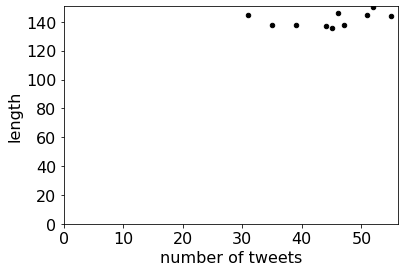

In [90]:
#q6
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    
scatter(prolificUsers,lengthBuckets, "number of tweets", "length")

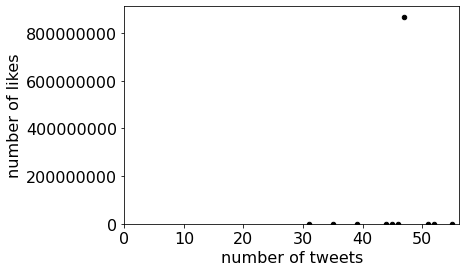

In [91]:
#q7
scatter(prolificUsers, likeDict,"number of tweets", "number of likes")

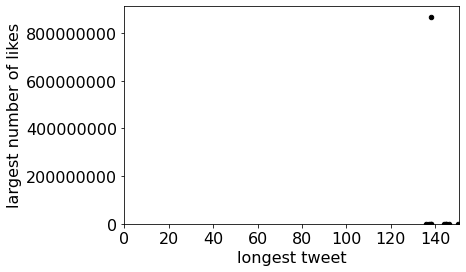

In [92]:
#q8
scatter(lengthBuckets,likeDict, "longest tweet", "largest number of likes")

In [93]:
#q9
sortedLikes=sorted(likeDict, key=lambda p:likeDict[p])
sortedLikes[-1]

'USERID_2'

In [94]:
#q10
mostlikes=str(sortedLikes[-1])
sortedlikes=sorted(prolificUserBucket[mostlikes], key=lambda p:p.num_liked, reverse=True)
sortedlikes

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [95]:
#q11
noOutlier=sortedlikes[1:]
cnt=0
tot=0
for x in noOutlier:
    tot+=x.num_liked
    cnt+=1
    
int(tot/cnt*100)/100

5003.56

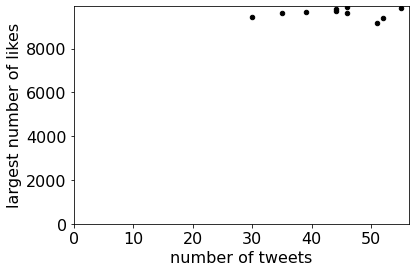

In [96]:
#q12
def cleanUserBuck(ls):
    prolificUserBucket={}
    for tweets in ls:
            if tweets.username not in prolificUserBucket:
                prolificUserBucket[tweets.username]=[]
            if tweets.username in prolificUserBucket:
                prolificUserBucket[tweets.username].append(tweets)
    return prolificUserBucket

allTweetList=[]
for tList in totTweets:
    for twe in tList:
        allTweetList.append(twe)
sortAllTweets=sorted(allTweetList, key=lambda p:p.num_liked, reverse=True)

def compareTo(exclusionNum):
    dataUsed=sortAllTweets[(exclusionNum):]
    
    userBucks=cleanUserBuck(dataUsed)
    
    likeBucks=likeBucket(userBucks)
    
    proBucks=prolifUser(userBucks)
    
    scatter(proBucks,likeBucks,"number of tweets","largest number of likes")
compareTo(3) 

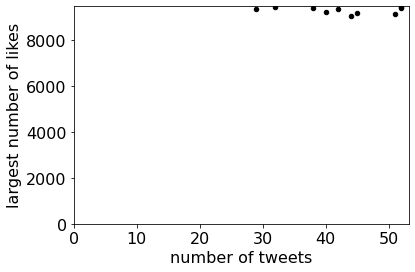

In [97]:
#q13
compareTo(20)

In [98]:
#q14


def pathList(directory):
    try:
        if directory[0]==".":
            return None
        newDir=os.listdir(directory)
        fileList=[]
        for x in newDir:
            if x[0]==".":
                return None
            joined=os.path.join(directory,x)
            if os.path.isdir(joined):
                fileList+=pathList(joined)
            if os.path.isfile(joined):
                fileList.append(joined)
        return sorted(fileList)
    except:
        print("file not found bro")
        
playPaths=pathList("play")
rbList=[]
for x in playPaths:
    if "rb" in x:
        rbList.append(x)
        
rbList

['play\\rb\\ppt.ppt', 'play\\rb\\rb9\\12.xls', 'play\\rb\\rb9\\89.csv']

In [99]:
#q15
qlsList=[]
for x in playPaths:
    if ("qwe" in x) and ("ls" in x):
        qlsList.append(x)
qlsList

['play\\ls\\qwe\\iuqwe.json', 'play\\ls\\qwe\\usun.pdf']

In [100]:
#q16
playPaths

['play\\ls\\lu.txt',
 'play\\ls\\mf.py',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ou\\a',
 'play\\ou\\b',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\v',
 'play\\rb\\ppt.ppt',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\rb9\\89.csv']

In [101]:
#q17
recList=pathList("recursive")
otherList=[]
for x in recList:
    if "others" in x:
        otherList.append(x)
otherList

['recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [102]:
#q18
recList

['recursive\\USERID_1\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_4\\1.csv',
 'recursive\\USERID_4\\1.json',
 'recursive\\USERID_4\\2.csv',
 'recursive\\USERID_4\\2.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [109]:
#q19
user4files=[]
for x in recList:
    if "USERID_4" in x:
        user4files.append(x)
user4tweets=[]
for x in user4files:
    if ".csv" in x:
        user4tweets+=tweetsincsv(x)
    if ".json" in x:
        user4tweets+=tweetsinjson(x)
        
len(user4tweets)

37

In [110]:
#q20
allT=[]
for x in recList:
    if ".csv" in x:
        allT+=tweetsincsv(x)
    if ".json" in x:
        allT+=tweetsinjson(x)
len(allT)

220